# What  Makes Great Chocolate?

### By Yi Cheng

![image info](https://www.foodsafetynews.com/files/2021/05/dreamstime_chocolate-cocoa-confectionery.jpg)


## Introduction

In this project, I am going to use the Chocolate Bar Rating dataset from Kaggle: https://www.kaggle.com/rtatman/chocolate-bar-ratings to answer 3 data questions by exploring the data. The process can be broken down into 3 steps:
1. Business Understanding
2. Prepare Data
3. Analyze, Visualize and Interpret Insights



## 1. Business Understanding

Chocolate is one of the most popular candies in the world. Often I ask myself, what's the secret of tasting chocolate? I came across with the Chocolate Rating Bar dataset in Kaggle and decided to take a deep look.
This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown. The database is narrowly focused on plain dark chocolate with an aim of appreciating the flavors of the cacao when made into chocolate. 

Rating System:  
  5 = Elite (Transcending beyond the ordinary limits)  
  4 = Premium (Superior flavor development, character and style)  
  3 = Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)  
  2 = Disappointing (Passable but contains at least one significant flaw)  
  1 = Unpleasant (mostly unpalatable)  
  
Below are the questions come into my mind:  
  1. Does higher cocoa percentage associated with higher rating? 
  2. Which company location has the best chocolate rating?
  3. Which types of cocoa beans produce the highest rating chocolate?

## 2. Prepare Data

In [2]:
# import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
# import dataset
df = pd.read_csv('/Users/chengyi/ChocolateBar/flavors_of_cacao.csv')

In [7]:
df.head(5)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [8]:
# rename columns
df = df.rename(columns = {'Company \n(Maker-if known)': 'Company', 
                   'Specific Bean Origin\nor Bar Name': 'Bean_origin',
                   'REF': 'Insert_dt', 
                   'Review\nDate': 'Review_year', 
                   'Cocoa\nPercent': 'Cocoa_percent', 
                   'Company\nLocation': 'Location', 
                   'Rating': 'Rating',
                   'Bean\nType': 'Bean_type', 
                   'Broad Bean\nOrigin': 'Broad_origin'})
df.columns.values[0] = 'Company'
df.columns

Index(['Company', 'Bean_origin', 'Insert_dt', 'Review_year', 'Cocoa_percent',
       'Location', 'Rating', 'Bean_type', 'Broad_origin'],
      dtype='object')

In [9]:
df.shape

(1795, 9)

### Data Columns

After renaming, we can clearly see 9 data columns in dataset:
* Company: Name of the company manufacturing the bar.  
* Bean_origin: The specific geo-region of origin for the bar.
* Insert_dt: A value linked to when the review was entered in the database. Higher = more recent.
* Review_year: Date of publication of the review.
* Cocoa_percent: Cocoa percentage (darkness) of the chocolate bar being reviewed.
* Location: Manufacturer base country.
* Rating: Expert rating for the bar.
* Bean_type: The variety (breed) of bean used, if provided.
* Broad_origin: The broad geo-region of origin for the bean.

In [10]:
 # convert string percent to numeric
df['Cocoa_percent'] = df['Cocoa_percent'].str.replace(r'%', '').astype('float') / 100.0

 # check NA
for col in df.select_dtypes(include = ['object']).columns:
    nmiss = df[col].isnull().sum()
    nvoid = df[df[col].str.strip() == ''].shape[0]
    pmiss = df[col].isnull().sum() / len(df)
    print(f'''{col}: nmiss: {nmiss}, nvoid: {nvoid}, pmiss: {pmiss:.3%}''')

for col in df.select_dtypes(include = ['number']).columns:
    nmiss = df[col].isnull().sum()
    pmiss = df[col].isnull().sum() / len(df)
    print(f'''{col}: nmiss: {nmiss}, pmiss: {pmiss:.3%}''')

Company: nmiss: 0, nvoid: 0, pmiss: 0.000%
Bean_origin: nmiss: 0, nvoid: 0, pmiss: 0.000%
Location: nmiss: 0, nvoid: 0, pmiss: 0.000%
Bean_type: nmiss: 1, nvoid: 887, pmiss: 0.056%
Broad_origin: nmiss: 1, nvoid: 73, pmiss: 0.056%
Insert_dt: nmiss: 0, pmiss: 0.000%
Review_year: nmiss: 0, pmiss: 0.000%
Cocoa_percent: nmiss: 0, pmiss: 0.000%
Rating: nmiss: 0, pmiss: 0.000%


We will drop 1 observation with **Bean_type** missing. Although there are 887 observations with void value of **Bean_type** and 73 observations with void value of **Broad_origin**, we will not remove it for now due to data scarity.

In [11]:
# drop NA
df = df.dropna(how = 'any')
# check for duplicate rows
sum(df.duplicated())

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1793 non-null   object 
 1   Bean_origin    1793 non-null   object 
 2   Insert_dt      1793 non-null   int64  
 3   Review_year    1793 non-null   int64  
 4   Cocoa_percent  1793 non-null   float64
 5   Location       1793 non-null   object 
 6   Rating         1793 non-null   float64
 7   Bean_type      1793 non-null   object 
 8   Broad_origin   1793 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 140.1+ KB


### Take A Look At Data

In [13]:
# Numeric Data
df.describe(include = np.number)

,Insert_dt,Review_year,Cocoa_percent,Rating
count,1793.000000,1793.000000,1793.000000,1793.000000
mean,1036.126046,2012.326269,0.716991,3.185862
std,553.128742,2.928666,0.063265,0.477668
min,5.000000,2006.000000,0.420000,1.000000
25%,576.000000,2010.000000,0.700000,3.000000
50%,1073.000000,2013.000000,0.700000,3.250000
75%,1502.000000,2015.000000,0.750000,3.500000
max,1952.000000,2017.000000,1.000000,5.000000


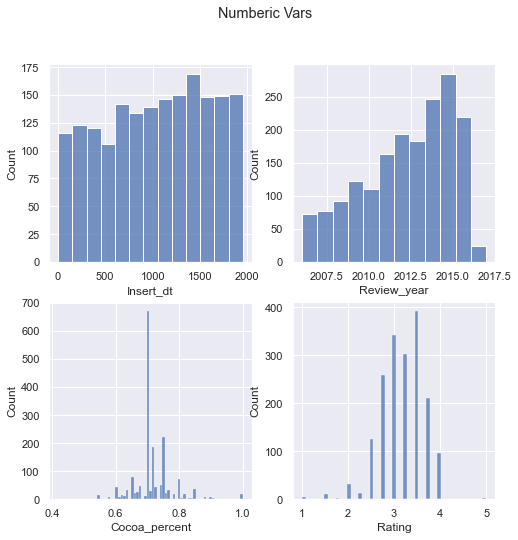

In [14]:
# plot the distribution of numeric data
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
fig.suptitle('Numberic Vars')

sns.histplot(ax = axes[0,0], data = df, x = "Insert_dt")
sns.histplot(ax = axes[0,1], data = df, x = "Review_year", bins = 12)
sns.histplot(ax = axes[1,0], data = df, x = "Cocoa_percent")
sns.histplot(ax = axes[1,1], data = df, x = "Rating")
plt.show()

In [15]:
# Categorical Data
#df.describe(include=np.object)
df.describe(include = ['O'])

,Company,Bean_origin,Location,Bean_type,Broad_origin
count,1793,1793,1793,1793,1793
unique,416,1038,60,41,99
top,Soma,Madagascar,U.S.A.,,Venezuela
freq,46,56,763,887,214


## 3. Analyze, Visualize and Interpret Insights

### Question 1. Does higher cocoa percentage associated with higher rating? 

The dataset tends to be time-dependent as it contains bar ratings from 2006 to 2017. Therefore, before dive deep into column **Cocoa_percent** and **Rating**, it is intuitive to check if levels of rating/Cocoa percentage are stable over time (i.e., across **Review years**).

From the plots below, we can see that rating increases slightly over year but remain between 3.0 and 3.5. On the other hand, percentage of cocoa also shows a slight increase trend with average value remain between 0.7 and 0.73. We can conclude that **Cocoa_percent** and **Rating** are stable over time.

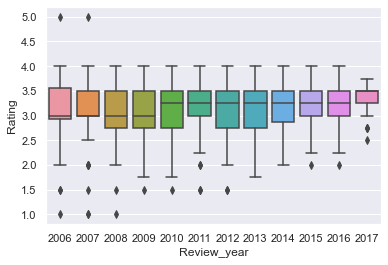

In [16]:
sns.boxplot(x = "Review_year", y = "Rating", data = df);

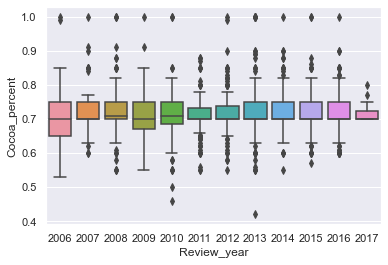

In [17]:
sns.boxplot(x = "Review_year", y = "Cocoa_percent", data = df); # Also increasing.

In [18]:
df.groupby('Review_year')[['Cocoa_percent', 'Rating']].mean()

,Cocoa_percent,Rating
Review_year,,
2006,0.710000,3.125000
2007,0.720390,3.162338
2008,0.726989,2.994624
2009,0.704431,3.073171
2010,0.707793,3.148649
2011,0.709756,3.251524
2012,0.715258,3.181701
2013,0.722663,3.197011
2014,0.722530,3.189271


In [19]:
# Check association between cocoa percentage and rating
df.groupby(['Rating']).Cocoa_percent.agg(['mean','median','count']).sort_values(by = 'Rating', ascending = False)

,mean,median,count
Rating,,,
5.00,0.700000,0.700,2
4.00,0.708144,0.700,97
3.75,0.708500,0.700,210
3.50,0.711607,0.700,392
3.25,0.714125,0.700,303
3.00,0.717742,0.700,341
2.75,0.721795,0.700,259
2.50,0.717897,0.710,126
2.25,0.740000,0.725,14


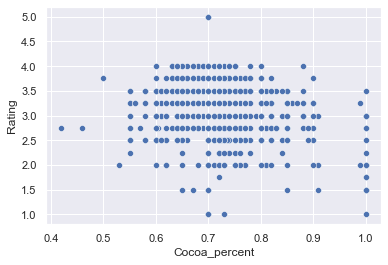

In [20]:
# visualize association
sns.scatterplot(data = df, x = "Cocoa_percent", y = "Rating");

**Findings**:

From the scatter plot above, there is no obvious association between cocoa percentage and rating when cocoa percentage <= 90%. Regardless of rating from premium taste (Rating = 4) to disappointing (Rating = 2), level of cocoa percentage remain the same with mean value around 70%. However, by focusing on chocolate with cocoa percentage >90% in the plot, it is clear that those chocolate, as a whole, received worse ratings.

Therefore, we can conclude that higher cocoa percentage has nothing to do with higher rating. In addition, extreme high cocoa percentage (above 90%) would hurt rating. 

### Question 2. Which company location has best chocolate rating? 

In [22]:
# take a look at company location distribution
tmp1 = df.groupby(['Location']).Rating.agg(['count']).sort_values(by = 'count', ascending = False)
tmp1['pct'] = tmp1['count'] / len(df)
tmp1['cum_pct'] = tmp1['pct'].cumsum()
tmp1[:15]

,count,pct,cum_pct
Location,,,
U.S.A.,763,0.425544,0.425544
France,156,0.087005,0.512549
Canada,124,0.069158,0.581707
U.K.,96,0.053542,0.635248
Italy,63,0.035137,0.670385
Ecuador,54,0.030117,0.700502
Australia,49,0.027328,0.727830
Belgium,40,0.022309,0.750139
Switzerland,38,0.021194,0.771333


Among 60 countries (**Location**), 15 countries account for 85% of total records. Our analysis will focus on those countries with these countries, i.e., countires with record count >= 20.

In [23]:
# get rid of non representative data
flt = df.groupby(['Location']).filter(lambda x: len(x) >= 20)

In [24]:
# summarize average rating across locations, sort by average rating.
# ** in case rating is affected by cocoa percentage(not the case from Question 1 though), summarize cocoa_percent as well.
rank = flt.groupby(['Location'])[['Rating','Cocoa_percent']].mean().sort_values(by = 'Rating', ascending = False)
rank

,Rating,Cocoa_percent
Location,,
Australia,3.357143,0.702245
Switzerland,3.342105,0.712105
Italy,3.325397,0.711905
Canada,3.318548,0.723710
Spain,3.270000,0.728800
France,3.251603,0.717628
Austria,3.240385,0.720000
Hungary,3.204545,0.723182
Germany,3.178571,0.729429


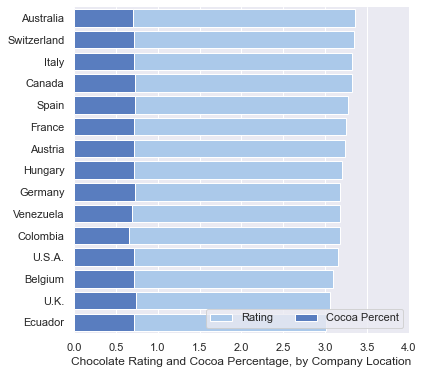

In [25]:
# visualize findings
f, ax = plt.subplots(figsize = (6, 6))

sns.set_color_codes("pastel")
sns.barplot(x = "Rating", y = rank.index, data = rank,
            label = "Rating", color = "b")

sns.set_color_codes("muted")
sns.barplot(x = "Cocoa_percent", y = rank.index, data=rank,
            label = "Cocoa Percent", color = "b")

ax.legend(ncol = 2, loc = "lower right", frameon = True)
ax.set(xlim = (0, 4), ylabel = "",
       xlabel = "Chocolate Rating and Cocoa Percentage, by Company Location")
sns.despine(left = True, bottom = True)

**Findings**

From the summarized data and barplot, we can see the top 3 company locations for best rating chocolate are:  
  1. Australia  
  2. Switzerland  
  3. Italy.   

Additionaly:
* By visually comparing rating and cocoa percent, we can conclude again for question 1 that percentage of cocoa has nothing to do with rating. 
* For this question, due to data scacity, we use more representative data by excluding company locations that have less than 20 data entries. If more data is available, further analysis can be done by summarizing average rating across countries given similar bean types or broad regions of bean.

### Question 3: Which types of bean produce highest rating chocolate?

In [26]:
# clean data, remove records with void value.
df_bean = df[df['Bean_type'].str.strip() != '']    

In [27]:
# Take a look bean type distribution
tmp2 = df_bean.groupby('Bean_type').Rating.agg(['count']).sort_values(by = 'count', ascending = False)
tmp2['pct'] = tmp2['count'] / len(df_bean)
tmp2['cum_pct'] = tmp2['pct'].cumsum()
tmp2[:10]

,count,pct,cum_pct
Bean_type,,,
Trinitario,418,0.461369,0.461369
Criollo,153,0.168874,0.630243
Forastero,87,0.096026,0.726269
Forastero (Nacional),52,0.057395,0.783664
Blend,41,0.045254,0.828918
"Criollo, Trinitario",39,0.043046,0.871965
Forastero (Arriba),37,0.040839,0.912804
Criollo (Porcelana),10,0.011038,0.923841
"Trinitario, Criollo",9,0.009934,0.933775


In [28]:
df_bean.Bean_type.nunique()

40

Among 40 cocoa bean types, 10 cocoa bean types ccount for 94.2% of total records. Due to data scarity, our analysis will focus on those 10 cocoa bean types.

In [29]:
# Filter dataset to only include top 10 occurance beans
df_bean_flt = df_bean.groupby(['Bean_type']).filter(lambda x: len(x) >= 8)
df_bean_flt.Bean_type.nunique()

10

In [30]:
# check shape
df_bean_flt.shape

(854, 9)

In [31]:
# Rank top 10 beans by average rating
result = df_bean_flt.groupby('Bean_type').agg({'Rating': 'mean', 'Company':'count'})
result.rename(columns={'Company': 'Cnt'},inplace=True)
result = result.sort_values(by = 'Rating', ascending = False)
result

,Rating,Cnt
Bean_type,,
Forastero (Parazinho),3.531250,8
Criollo (Porcelana),3.375000,10
Blend,3.353659,41
"Criollo, Trinitario",3.294872,39
Forastero (Nacional),3.269231,52
Trinitario,3.247608,418
Criollo,3.240196,153
Forastero,3.100575,87
"Trinitario, Criollo",3.027778,9


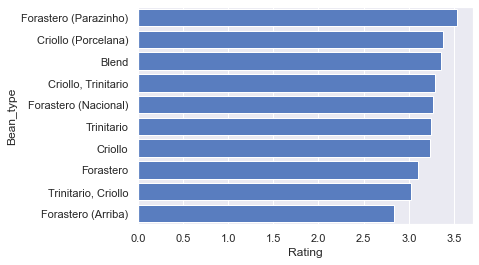

In [32]:
# visualize finding
sns.barplot(x = "Rating", y = result.index, data = result,
            label = "Rating", color = "b");

**Findings**

From the summarized data and barplot, we can see the top 3 cocoa beans that produce best rating chocolate are:  
  1. Forastero (Parazinho) 
  2. Criollo (Porcelana)
  3. Blend

## Reference

https://seaborn.pydata.org/generated/seaborn.boxplot.html

https://seaborn.pydata.org/examples/part_whole_bars.html

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet

https://github.com/stephanieirvine/Udacity-Data-Scientist-Nanodegree/blob/main/Project%201/Wine_Rating_StephIrvine.ipynb Thanks Stephanie for inspiring me on the structure of this post :P